In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

ĐỌC DỮ LIỆU TỪ FILE CSV

In [3]:
Data_inland = pd.read_csv('Datasets/housing_inland.csv')
Data_near_ocean = pd.read_csv('Datasets/housing_near_ocean.csv')

VẤN ĐỀ 02: 

- Xây dựng khoảng tin cậy cho $\mu$ 

- Kiểm dịnh giá thuyết:

    + Với giá nhà: kiểm định rằng " $\mu$ > 31000$ hay không"
    + Với thu nhập: kiểm định rằng " $\mu$ > 3100$  hay không"

Ở đây, tôi sẽ xây dựng khoảng tin cậy 95%

-> $\alpha$ = 0.05 -> $Z_{\alpha/2}$ $\approx$ $1.95996$

In [4]:
CI_level = 0.95 
alpha = 1 - CI_level
Z_alpha2 = norm.ppf(0.975,0,1) #(giá trị muốn tính, mean, std)

Tiếp theo ta sẽ tính $\bar{x}$ của Median Housing Value và Median Income của những căn nhà trong đất liền

In [5]:
mean_inland_income = Data_inland.describe()['median_income'].loc['mean']
std_inland_income = Data_inland.describe()['median_income'].loc['std']

mean_inland_house_value = Data_inland.describe()['median_house_value'].loc['mean']
std_inland_house_value = Data_inland.describe()['median_house_value'].loc['std']

Khoảng tin cậy của giá trị trung bình cho thu nhập trung bình

In [6]:
lower_inland_income_CI = mean_inland_income - Z_alpha2*(std_inland_income/math.sqrt(Data_inland.shape[0]))
upper_inland_income_CI = mean_inland_income + Z_alpha2*(std_inland_income/math.sqrt(Data_inland.shape[0]))

In [7]:
print(f'Khoảng tin cậy 95% của thu nhập trung bình là ({lower_inland_income_CI:.2f},{upper_inland_income_CI:.2f})')

Khoảng tin cậy 95% của thu nhập trung bình là (3.17,3.24)


Khoảng tin cậy của giá trị trung bình cho giá nhà

In [8]:
lower_inland_house_value_CI = mean_inland_house_value - Z_alpha2*(std_inland_house_value/math.sqrt(Data_inland.shape[0]))
upper_inland_house_value_CI = mean_inland_house_value + Z_alpha2*(std_inland_house_value/math.sqrt(Data_inland.shape[0]))

In [9]:
print(f'Khoảng tin cậy 95% của giá nhà trung bình là ({lower_inland_house_value_CI:.2f},{upper_inland_house_value_CI:.2f})')

Khoảng tin cậy 95% của giá nhà trung bình là (123110.11,126500.67)


Trực quan hóa khoảng tin cậy

Text(0.5, 1.0, 'Khoảng tin cậy 95% của trung bình thu nhập')

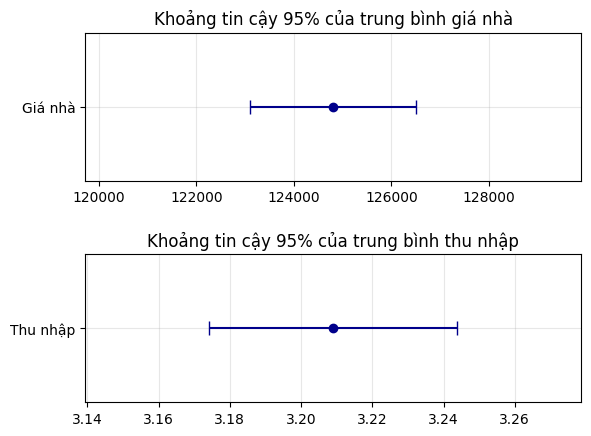

In [10]:
fig,ax = plt.subplots(2,1)

ax[0].errorbar(y=['Giá nhà'],
             x=[mean_inland_house_value],
             xerr=[Z_alpha2*(std_inland_house_value/math.sqrt(Data_inland.shape[0]))],
             fmt='o',capsize=5,color='darkblue')
ax[0].margins(1)
ax[0].grid(alpha=0.3)
ax[0].set_title(f'Khoảng tin cậy 95% của trung bình giá nhà')

plt.subplots_adjust(hspace=0.5)
ax[1].errorbar(y=['Thu nhập'],
             x=[mean_inland_income],
             xerr=[Z_alpha2*(std_inland_income/math.sqrt(Data_inland.shape[0]))],
             fmt='o',capsize=5,color='darkblue')
ax[1].margins(0.5)
ax[1].grid(alpha=0.3)
ax[1].set_title(f'Khoảng tin cậy 95% của trung bình thu nhập')

TƯƠNG TỰ VỚI DỮ LIỆU INLAND TA CŨNG SẼ THỰC HIỆN TƯƠNG TỰ VỚI DỮ LIỆU NEAR_OCEAN 

In [11]:
mean_nearocean_income = Data_near_ocean.describe()['median_income'].loc['mean']
std_nearocean_income = Data_near_ocean.describe()['median_income'].loc['std']

mean_nearocean_house_value = Data_near_ocean.describe()['median_house_value'].loc['mean']
std_nearocean_house_value = Data_near_ocean.describe()['median_house_value'].loc['std']

In [12]:
lower_nearocean_income_CI = mean_nearocean_income - Z_alpha2*(std_nearocean_income/math.sqrt(Data_near_ocean.shape[0]))
upper_nearocean_income_CI = mean_nearocean_income + Z_alpha2*(std_nearocean_income/math.sqrt(Data_near_ocean.shape[0]))

In [13]:
print(f'Khoảng tin cậy 95% của thu nhập trung bình là ({lower_nearocean_income_CI:.2f},{upper_nearocean_income_CI:.2f})')

Khoảng tin cậy 95% của thu nhập trung bình là (3.93,4.08)


In [14]:
lower_nearocean_house_value_CI = mean_nearocean_house_value - Z_alpha2*(std_nearocean_house_value/math.sqrt(Data_near_ocean.shape[0]))
upper_nearocean_house_value_CI = mean_nearocean_house_value + Z_alpha2*(std_nearocean_house_value/math.sqrt(Data_near_ocean.shape[0]))

In [15]:
print(f'Khoảng tin cậy 95% của thu nhập trung bình là ({lower_nearocean_house_value_CI:.2f},{upper_nearocean_house_value_CI:.2f})')

Khoảng tin cậy 95% của thu nhập trung bình là (244777.84,254090.11)


Text(0.5, 1.0, 'Khoảng tin cậy 95% của trung bình thu nhập')

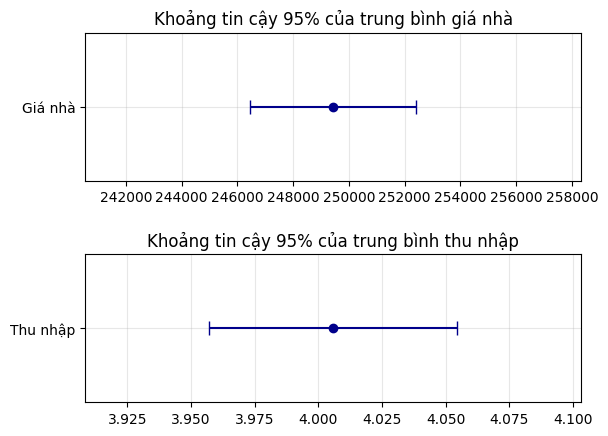

In [16]:
fig,ax = plt.subplots(2,1)

ax[0].errorbar(y=['Giá nhà'],
             x=[mean_nearocean_house_value],
             xerr=[Z_alpha2*(std_nearocean_house_value/math.sqrt(Data_inland.shape[0]))],
             fmt='o',capsize=5,color='darkblue')
ax[0].margins(1)
ax[0].grid(alpha=0.3)
ax[0].set_title(f'Khoảng tin cậy 95% của trung bình giá nhà')

plt.subplots_adjust(hspace=0.5)
ax[1].errorbar(y=['Thu nhập'],
             x=[mean_nearocean_income],
             xerr=[Z_alpha2*(std_nearocean_income/math.sqrt(Data_inland.shape[0]))],
             fmt='o',capsize=5,color='darkblue')
ax[1].margins(0.5)
ax[1].grid(alpha=0.3)
ax[1].set_title(f'Khoảng tin cậy 95% của trung bình thu nhập')

BÂY GIỜ CHÚNG TA SẼ KIỂM ĐỊNH GIẢ THUYẾT

+ Với giá nhà: kiểm định rằng " $\mu$ > 310000$ hay không"
+ Với thu nhập: kiểm định rằng " $\mu$ > 3000$  hay không"

Đầu tiên ta sẽ kiểm định giả thuyết giá nhà trước

$H_0:\ \mu \le 310000 $ $ 

$H_1:\ \mu > 310000 $ $

Với $\alpha = 0.05 $

Chúng ta sẽ kiểm định giả thuyết với tập dữ liệu của những căn nhà trong đất liền trước

In [25]:
mu0 = 310000
alpha = 0.05

Z = (mean_inland_house_value - mu0)/(std_inland_house_value/math.sqrt(Data_inland.shape[0]))
p_value = 1 - norm.cdf(Z)
Z_crit = norm.ppf(1-alpha)

print(f"Z = {Z:.3f}")
print(f"Z-crit = {Z_crit:.3f}")
print(f"p-value = {p_value:.3e}")

if Z > Z_crit:
    print("Bác bỏ H0")
else:
    print("Không bác bỏ H0")

Z = -214.109
Z-crit = 1.645
p-value = 1.000e+00
Không bác bỏ H0


Tiếp theo chúng ta sẽ kiểm định giá thuyết với những căn nhà ven biển

In [27]:
mu0 = 310000
alpha = 0.05

Z = (mean_nearocean_house_value - mu0)/(std_nearocean_house_value/math.sqrt(Data_near_ocean.shape[0]))
p_value = 1 - norm.cdf(Z)
Z_crit = norm.ppf(1-alpha)

print(f"Z = {Z:.3f}")
print(f"Z-crit = {Z_crit:.3f}")
print(f"p-value = {p_value:.3e}")

if Z > Z_crit:
    print("Bác bỏ H0")
else:
    print("Không bác bỏ H0")

Z = -25.495
Z-crit = 1.645
p-value = 1.000e+00
Không bác bỏ H0


Trực quan hóa dữ liệu và giả thuyết về giá nhà ở đất liền và ven biển

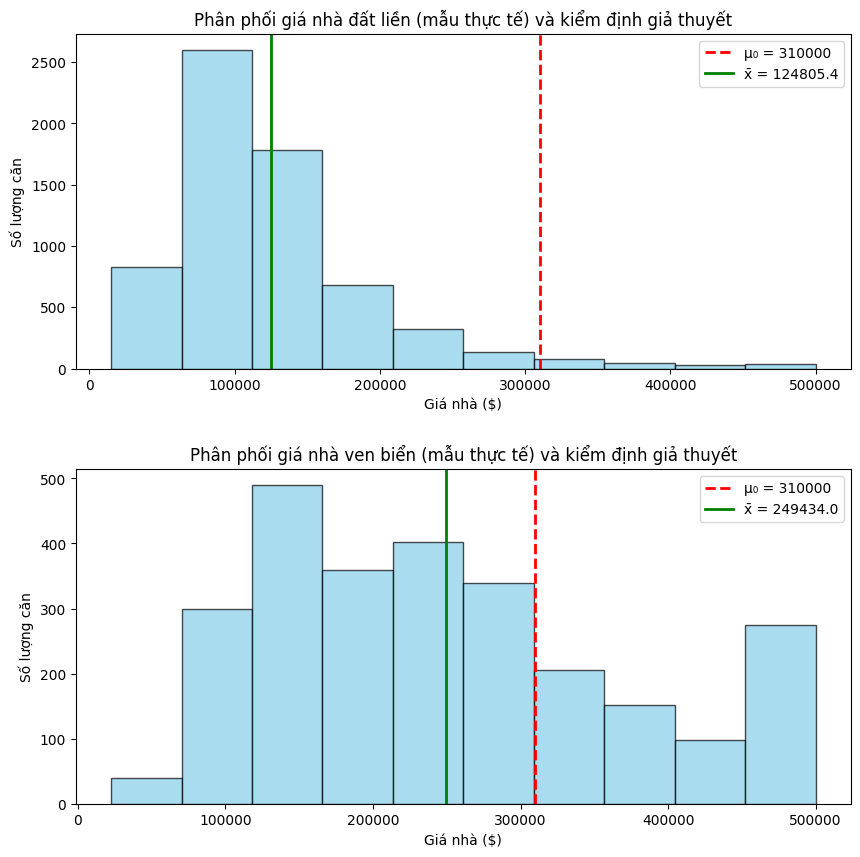

In [34]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].hist(Data_inland['median_house_value'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
ax[0].axvline(mu0, color='red', linestyle='--', linewidth=2, label=f"μ₀ = {mu0}")
ax[0].axvline(mean_inland_house_value, color='green', linestyle='-', linewidth=2, label=f"x̄ = {mean_inland_house_value:.1f}")
ax[0].set_title("Phân phối giá nhà đất liền (mẫu thực tế) và kiểm định giả thuyết")
ax[0].set_xlabel("Giá nhà ($)")
ax[0].set_ylabel("Số lượng căn")
ax[0].legend()

plt.subplots_adjust(hspace=0.3)

ax[1].hist(Data_near_ocean['median_house_value'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
ax[1].axvline(mu0, color='red', linestyle='--', linewidth=2, label=f"μ₀ = {mu0}")
ax[1].axvline(mean_nearocean_house_value, color='green', linestyle='-', linewidth=2, label=f"x̄ = {mean_nearocean_house_value:.1f}")
ax[1].set_title("Phân phối giá nhà ven biển (mẫu thực tế) và kiểm định giả thuyết")
ax[1].set_xlabel("Giá nhà ($)")
ax[1].set_ylabel("Số lượng căn")
ax[1].legend()

Tiếp theo ta sẽ kiểm định giả thuyết về thu nhập

$H_0:\ \mu \le 3000 $ $ 

$H_1:\ \mu > 3000 $ $

Với $\alpha = 0.05 $